<a href="https://colab.research.google.com/github/raulaugusto/Data_Explorers/blob/main/C%C3%B3pia_de_An%C3%A1lise_de_Dados_Explorat%C3%B3ria_das_Altera%C3%A7%C3%B5es_nos_Valores_de_Bitcoins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados Exploratória das Alterações nos Valores de Bitcoins

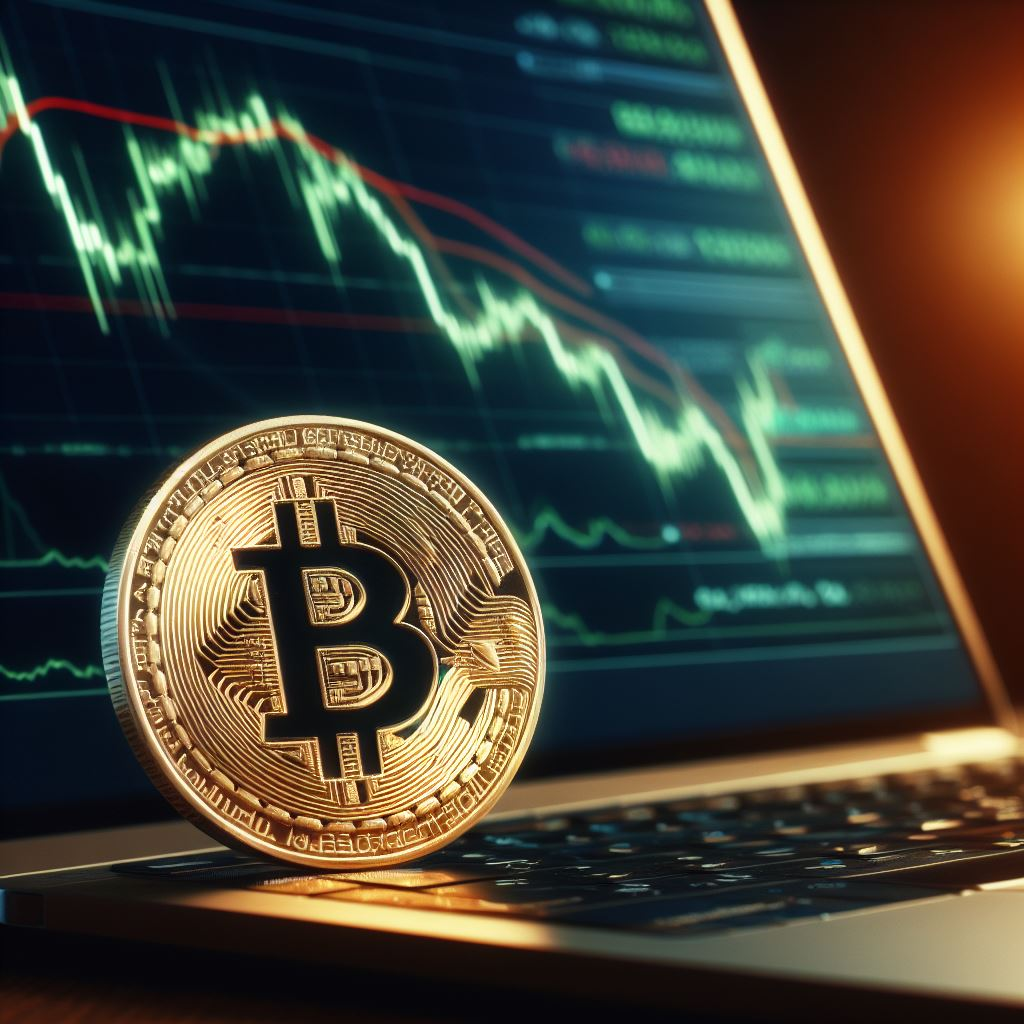

O mercado dos bitcoins é conhecido por sua volatilidade e dinâmica única.

Essa análise visa fornecer uma visão detalhada do processo de análise de dados relacionado às alterações nos valores dos bitcoins. O objetivo principal é entender padrões, tendências e fatores que influenciam essas mudanças utilizando o banco de dados do [Bitcoin Historical Data](https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data).

## Objetivos
1. [A adoção institucional pode influenciar positivamente ou negativamente o valor dos bitcoins?](#ob1)
3. [A regulação governamental influencia positiva ou negativamente o valor dos bitcoins?](#ob2)
4. [A segurança e os incidentes de hacking têm um impacto negativo ou positivo nos bitcoins?](#ob3)

## Metodologia

A limpeza do dado foi feita utilizando a ferramenta MongoDB Compass visando remover todos os documentos que possuiam um ou mais campos com valor nulo, vazio ou com o valor "NaN", que é como os campos vazios foram preenchidos nesse dataset.

```
use Bitcoin <br>
db.Bitcoin_Price_Variations.deleteMany({
  $or: [
    { campo: { $exists: false } },
    { campo: { $eq: null } },
    { campo: { $eq: "NaN" } }
  ]
})

```



Após rodar o mesmo código para todas os campos utilizados na pesquisa, asseguramos que nenhum resultado seria comprometido por dados ausentes


Para a análise de nossos dados, utilizamos o Google Colab e Jupyter Notebook da Anaconda para criarmos um gráfico em Python que seria utilizado nos vários momentos expostos nas noticias investigadas e analisar como o valor da criptomoeda foi afetada pela noticia mencionada de acordo com o seu valor anterior e posterior.

Veja como ficou o template criado para analisar as situações:

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

drive.mount('/content/drive')
caminho_arquivo = '/content/drive/MyDrive/Bitcoin_Prices_DataSet/Bitcoin_Price_Variations.csv'
# Carregue os dados do CSV para um DataFrame do pandas
df = pd.read_csv(caminho_arquivo)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


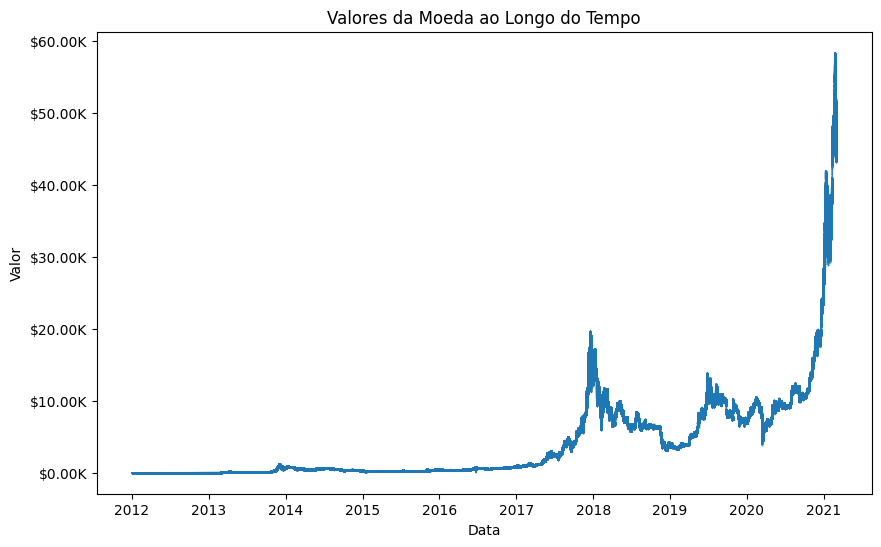

In [ ]:
# Defina o período específico
data_inicio_legivel = pd.Timestamp('2012-01-01')  # Utilizamos sistema de Datetime para definir o inicio do período a ser analisado
data_fim_legivel = pd.Timestamp('2021-03-01') # Utilizamos sistema de Datetime para definir o fim do período a ser analisado
data_inicio = data_inicio_legivel.timestamp()
data_fim = data_fim_legivel.timestamp()

# Filtrar os dados para o período específico
df_periodo = df[(df['Timestamp'] >= data_inicio) & (df['Timestamp'] <= data_fim)]
df_periodo_datetime = pd.to_datetime(df_periodo['Timestamp'], unit='s')

# Data específica a ser destacada (12/02/2021)
data_destaque = pd.Timestamp('2019-01-01')  # Utilizamos sistema de Datetime para definir o período em destaque no gráfico

# Função para formatar os valores do eixo Y em dólares
def formatar_dolares(valor, pos):
    return f'${valor / 1000:.2f}K'

# Criar um gráfico de linha usando matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_periodo_datetime, df_periodo['Close'], marker='o', linestyle='-', linewidth=1, markersize=0.1)
plt.title('Valores da Moeda ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.grid(False)

# Aplicar a formatação de dólares ao eixo Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_dolares))

plt.show()

### <a name="ob1"></a>A adoção institucional pode influenciar positivamente ou negativamente o valor dos bitcoins?

  A aceitação do Bitcoin para transações do serviço público sinaliza uma mudança significativa no paradigma financeiro tradicional. O tweet do governador não apenas atua como um divisor de águas para a adoção de criptomoedas em âmbito municipal, mas também repercute nos mercados globais de Bitcoin. A confiança na criptomoeda é fortalecida quando uma instituição governamental demonstra confiança e disposição para integrá-la em suas operações cotidianas.

  O impacto no valor da Bitcoin pode ser sentido imediatamente após o anúncio, com investidores reagindo positivamente à notícia de uma cidade adotando uma postura pró-criptomoedas. A percepção de legitimidade e aceitação institucional geralmente resulta em um aumento na demanda, que, por sua vez, influencia diretamente o valor de mercado da Bitcoin.

  Contudo, é importante notar que, embora esse tipo de anúncio tenha o potencial de impulsionar o valor da Bitcoin, também pode ser acompanhado por volatilidade. A reação dos investidores às notícias é muitas vezes marcada por especulação, e o valor da Bitcoin pode sofrer flutuações significativas antes de se estabilizar.

  O gráfico a seguir demonstra as flutuações no valor dos bitcoins após o prefeito de Miami, Francis Suarez, anunciou na quinta-feira (11/02/2021), através de sua conta no Twitter, que a cidade e seus habitantes poderão utilizar Bitcoin para diversas operações financeiras ligadas ao serviço público. Link da matéria: https://www.cnnbrasil.com.br/economia/miami-avanca-para-pagar-salarios-de-funcionarios-publicos-com-bitcoin/

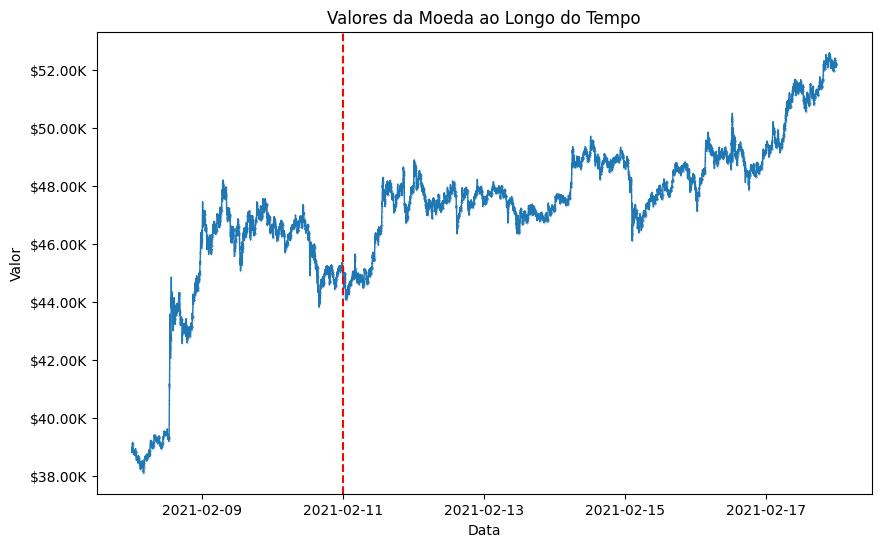

In [ ]:
# Defina o período específico
data_inicio_legivel = pd.Timestamp('2021-02-08')
data_fim_legivel = pd.Timestamp('2021-02-18')
data_inicio = data_inicio_legivel.timestamp()
data_fim = data_fim_legivel.timestamp()

# Filtrar os dados para o período específico
df_periodo = df[(df['Timestamp'] >= data_inicio) & (df['Timestamp'] <= data_fim)]
df_periodo_datetime = pd.to_datetime(df_periodo['Timestamp'], unit='s')

# Data específica a ser destacada (12/02/2021)
data_destaque = pd.Timestamp('2021-02-11')

# Função para formatar os valores do eixo Y em dólares
def formatar_dolares(valor, pos):
    return f'${valor / 1000:.2f}K'

# Criar um gráfico de linha usando matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_periodo_datetime, df_periodo['Close'], marker='o', linestyle='-', linewidth=1, markersize=0.1)
plt.axvline(x=data_destaque, color='red', linestyle='--', label='Data Destaque')
plt.title('Valores da Moeda ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.grid(False)

# Aplicar a formatação de dólares ao eixo Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_dolares))

plt.show()

### <a name="ob2"></a>A regulação governamental influencia positiva ou negativamente o valor dos bitcoins?

O emergente cenário de adoção de criptomoedas na África, especialmente na Nigéria, África do Sul e Quênia, está desencadeando uma verdadeira revolução econômica no continente. O registro de um aumento notável, superior a 55%, nas transferências mensais de criptomoedas acima de 10 mil dólares no último ano reflete a rápida aceitação desses ativos digitais. De maneira única, as criptomoedas estão sendo integradas extensivamente no comércio local, ganhando destaque entre indivíduos e pequenas empresas.

A despeito dos desafios, como a volatilidade e a falta de regulamentação, a África está se consolidando como um terreno fértil para a adoção generalizada de moedas virtuais. Essa tendência está alinhada com um movimento global em direção à descentralização financeira, proporcionando uma mudança de paradigma nas finanças do continente.

O impacto dessas mudanças é profundo, pois transcende os limites locais, influenciando a percepção global das criptomoedas. A África está emergindo como uma força significativa na adoção e integração desses ativos digitais, desafiando as narrativas tradicionais sobre o uso das criptomoedas. Esse fenômeno não apenas sinaliza uma revolução econômica, mas também destaca a crescente importância das criptomoedas como catalisadores de transformação nos mercados financeiros globais.

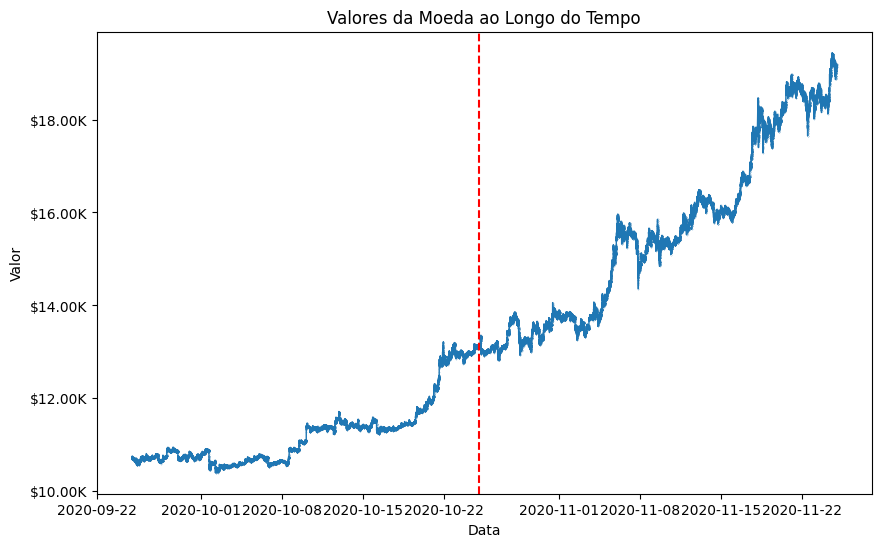

In [ ]:
# Defina o período específico
data_inicio_legivel = pd.Timestamp('2020-09-25')
data_fim_legivel = pd.Timestamp('2020-11-25')
data_inicio = data_inicio_legivel.timestamp()
data_fim = data_fim_legivel.timestamp()

# Filtrar os dados para o período específico
df_periodo = df[(df['Timestamp'] >= data_inicio) & (df['Timestamp'] <= data_fim)]
df_periodo_datetime = pd.to_datetime(df_periodo['Timestamp'], unit='s')

# Data específica a ser destacada (12/02/2021)
data_destaque = pd.Timestamp('2020-10-25')

# Função para formatar os valores do eixo Y em dólares
def formatar_dolares(valor, pos):
    return f'${valor / 1000:.2f}K'

# Criar um gráfico de linha usando matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_periodo_datetime, df_periodo['Close'], marker='o', linestyle='-', linewidth=1, markersize=0.1)
plt.axvline(x=data_destaque, color='red', linestyle='--', label='Data Destaque')
plt.title('Valores da Moeda ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.grid(False)

# Aplicar a formatação de dólares ao eixo Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_dolares))

plt.show()

### <a name="ob3"></a>A segurança e os incidentes de hacking têm um impacto negativo ou positivo nos bitcoins?

A Mt. Gox, que em tempos foi uma das maiores exchanges de Bitcoin do mundo, enfrentou um dos eventos mais marcantes e devastadores na história das criptomoedas em 2014. A plataforma declarou falência e alegou ter perdido aproximadamente 850.000 Bitcoins, o que representava uma fração significativa do fornecimento total de Bitcoin na época.

A violação de segurança na Mt. Gox expôs as vulnerabilidades das exchanges de criptomoedas e abalou a confiança dos investidores no ecossistema emergente das criptomoedas. A perda massiva de Bitcoins resultou em uma séria crise de confiança, gerando temores sobre a segurança e a robustez das plataformas de negociação.

O impacto no valor do Bitcoin foi imediato e significativo. A notícia da falência da Mt. Gox desencadeou uma venda massiva da criptomoeda, levando a uma queda acentuada nos preços. Os investidores, temendo pela segurança de seus ativos digitais, buscaram se desfazer de seus Bitcoins em um mercado já nervoso.

Além disso, a reputação do Bitcoin como uma forma segura de armazenar valor foi prejudicada, resultando em uma desconfiança generalizada em relação às exchanges e à capacidade do ecossistema de proteger os ativos dos usuários. Esse incidente serviu como um alerta para a necessidade de medidas mais robustas de segurança e regulamentação no espaço das criptomoedas.

Desde então, a indústria de criptomoedas evoluiu consideravelmente em termos de segurança e regulamentação. No entanto, eventos como o colapso da Mt. Gox continuam a influenciar a percepção dos investidores e a volatilidade dos preços do Bitcoin, destacando a importância da segurança e da confiança no desenvolvimento contínuo do ecossistema das criptomoedas.

Link de uma matéria da época: https://brasil.elpais.com/brasil/2014/02/25/tecnologia/1393319825_988195.html

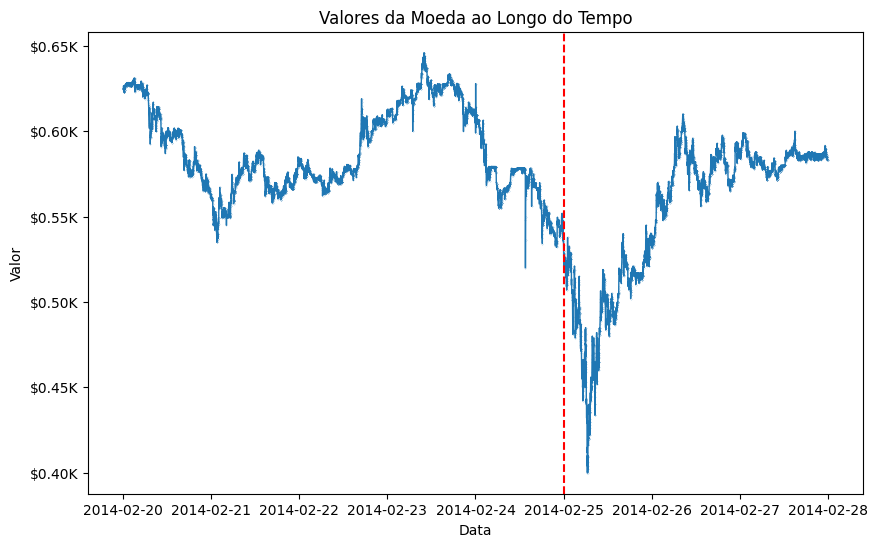

In [ ]:
# Defina o período específico
data_inicio_legivel = pd.Timestamp('2014-02-20')
data_fim_legivel = pd.Timestamp('2014-02-28')
data_inicio = data_inicio_legivel.timestamp()
data_fim = data_fim_legivel.timestamp()

# Filtrar os dados para o período específico
df_periodo = df[(df['Timestamp'] >= data_inicio) & (df['Timestamp'] <= data_fim)]
df_periodo_datetime = pd.to_datetime(df_periodo['Timestamp'], unit='s')

# Data específica a ser destacada (12/02/2021)
data_destaque = pd.Timestamp('2014-02-25')

# Função para formatar os valores do eixo Y em dólares
def formatar_dolares(valor, pos):
    return f'${valor / 1000:.2f}K'

# Criar um gráfico de linha usando matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_periodo_datetime, df_periodo['Close'], marker='o', linestyle='-', linewidth=1, markersize=0.1)
plt.axvline(x=data_destaque, color='red', linestyle='--', label='Data Destaque')
plt.title('Valores da Moeda ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.grid(False)

# Aplicar a formatação de dólares ao eixo Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_dolares))

plt.show()

## Conclusão

Nossa análise do Bitcoin fornece informações cruciais para investidores e traders decidirem quando comprar, vender ou manter ativos.


---


Na análise sobre "**A adoção institucional pode influenciar positivamente ou negativamente o valor dos bitcoins?**", concluimos que as adoções institucionais podem influenciar positivamente o valor da criptomeda.


---


Em "**A regulação governamental influencia positiva ou negativamente o valor dos bitcoins?**", concluimos que a regulamentação afeta positivamente o valor da criptomoeda, visto que com a adoção da África o valor do Bitcoin continuou a crescer.


---


Já em "**A segurança e os incidentes de hacking têm um impacto negativo ou positivo nos bitcoins?**" observamos que sempre que algum escândalo sobre segurança surge relacionado a criptomoeda o seu valor tem uma queda significativa.


---


Os pontos abordados em nossa pesquisa podem ser úteis para futuros investidos em criptomoedas, para que minimizem suas chances de erros ao tomar decisões mediante nóticias relacionadas a criptomoeda.

Contudo, a nossa análise pode ajudar novos investidores na tomada de decições e gestão de riscos, visto que ajuda a compreender os fatores que afetam o mercado do Bitcoin.